In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist



In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[0])

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 

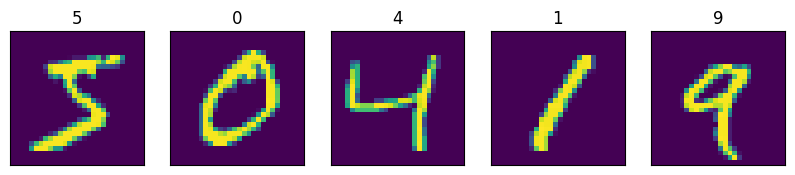

In [3]:
# Display some images
fig, axes = plt.subplots(ncols=5, figsize=(10, 4), sharex= True, sharey=True) # sharex and sharey show the position of the number in the image as 1
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i]) #cmap='gray' will display the image in gray scale
	axes[i].get_xaxis().set_visible(False) # it will not show the x-axis
	axes[i].get_yaxis().set_visible(False)# it will not show the y-axis
plt.show()



In [4]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))

y_train = np.array(temp)



In [5]:
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)



In [6]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the Neural Network model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6145 - acc: 0.5473 - val_loss: 1.2778 - val_acc: 0.6315
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1156 - acc: 0.6918 - val_loss: 0.9938 - val_acc: 0.7228
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9733 - acc: 0.7214 - val_loss: 0.9050 - val_acc: 0.7367
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9050 - acc: 0.7326 - val_loss: 0.8684 - val_acc: 0.7581
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8638 - acc: 0.7452 - val_loss: 0.8234 - val_acc: 0.7613
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8209 - acc: 0.7559 - val_loss: 0.7596 - val_acc: 0.7782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7964 - acc: 0.7562 - val_loss: 0.7535 - val_acc: 0.7667
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

In [8]:
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)



313/313 [==============================] - 0s 1ms/step


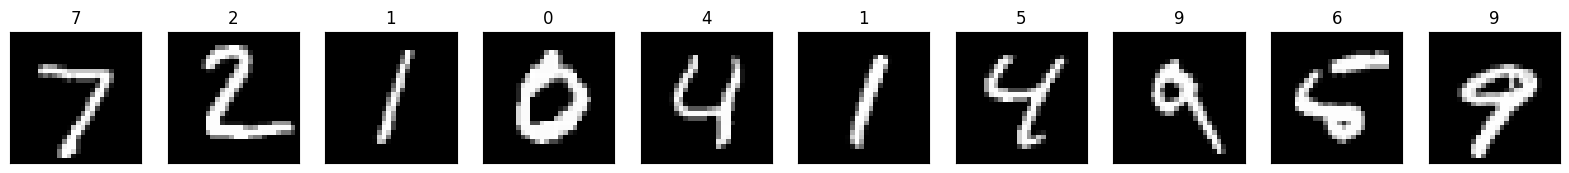

In [10]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()